In [1]:
import numpy as np
from scipy.misc import imread as im
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import confusion_matrix as CM
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score as recall
from sklearn.metrics import precision_score as precision
import os
from collections import Counter
%matplotlib inline

# Outlier Detection

In [2]:
## edit this to the result folder
folder = "/".join([os.getcwd(),"OutlierDetectionResult"])
print folder
lam_list = sorted(map(lambda x: float(x[3:]), filter(lambda x: 'lam' in x, os.listdir(folder))))
print lam_list

/home/czhou2/remoteJupyter/RobustAutoencoder/OutlierDetectionResult
[0.00013, 0.00014, 0.00015, 0.00016, 0.00017, 0.00018, 0.00019, 0.0002, 0.00021, 0.00022, 0.00023, 0.00024, 0.00025, 0.00026, 0.00027, 0.00028, 0.00029, 0.0003, 0.00031, 0.00032, 0.00033, 0.00034, 0.00035, 0.00036, 0.00037, 0.00038, 0.00039, 0.0004, 0.00041, 0.00042, 0.00043, 0.00044, 0.00045, 0.00046, 0.00047, 0.00048, 0.00049]


In [3]:
y = np.load(r"./data/y.npk")
stat = Counter(y)
print "number of majority:", stat[4]
print "number of outlier:", len(y) - stat[4]
print "outlier ratio:", (len(y) - stat[4])/float(stat[4])

number of majority: 4859
number of outlier: 265
outlier ratio: 0.0545379707759


In [4]:
def binary_error(value):
    if value != 0.0:
        return "o" # 'majority'
    else:
        return "m" #'outlier'
    
def binary_y(value):
    if value == 4:
        return "m"
    else:
        return "o"

bi_y = map(binary_y,y)
print Counter(bi_y)

Counter({'m': 4859, 'o': 265})


In [5]:
precisions=[]
lams=[]
recalls=[]
f1s = []
for i,lam in enumerate(lam_list):
    S = np.load(folder + "/" + "lam" + str(lam) + "/" + r"l21S.npk")    
    predictions = map(binary_error,np.linalg.norm(S,axis = 1))
    p = precision(bi_y,predictions,labels=["o","m"],pos_label="o")
    r = recall(bi_y,predictions,labels=["o","m"],pos_label="o")
    f1 = f1_score(bi_y,predictions,labels=["o","m"],pos_label="o")
    print "lambda:", lam
    print "stat:", Counter(predictions)
    print "precision",p
    print "recall",r
    print "f1",f1
    lams.append(lam)
    precisions.append(p)
    recalls.append(r)
    f1s.append(f1)
#     print CM(bi_y,predictions)
    print "------------"
print len(lams),len(recalls),len(f1s),len(precisions)

lambda: 0.00013
stat: Counter({'o': 5119, 'm': 5})
precision 0.0515725727681
recall 0.996226415094
f1 0.0980683506686
------------
lambda: 0.00014
stat: Counter({'o': 5084, 'm': 40})
precision 0.0515342250197
recall 0.988679245283
f1 0.0979622359319
------------
lambda: 0.00015
stat: Counter({'o': 4973, 'm': 151})
precision 0.0520812386889
recall 0.977358490566
f1 0.0988927071401
------------
lambda: 0.00016
stat: Counter({'o': 4770, 'm': 354})
precision 0.0526205450734
recall 0.947169811321
f1 0.0997020854022
------------
lambda: 0.00017
stat: Counter({'o': 4422, 'm': 702})
precision 0.0547263681592
recall 0.91320754717
f1 0.103264348197
------------
lambda: 0.00018
stat: Counter({'o': 3923, 'm': 1201})
precision 0.0609227631914
recall 0.901886792453
f1 0.114135625597
------------
lambda: 0.00019
stat: Counter({'o': 3716, 'm': 1408})
precision 0.0640473627557
recall 0.898113207547
f1 0.119567947752
------------
lambda: 0.0002
stat: Counter({'o': 2709, 'm': 2415})
precision 0.083794758

/home/czhou2/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/czhou2/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.474708171206


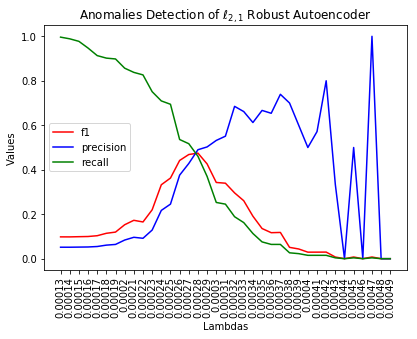

In [6]:
print np.max(f1s)
plt.figure(figsize=(6.5,4.5))
plt.xlabel("Lambdas")
plt.ylabel("Values")
plt.plot(range(len(lams)),f1s,color='r',label="f1")
plt.plot(range(len(lams)),precisions,color="b",label="precision")
plt.plot(range(len(lams)),recalls,color="g",label="recall")
plt.legend(["f1","precision","recall"],loc='best')
plt.xticks(range(len(lams)), lam_list,rotation='vertical')
plt.title("Anomalies Detection of $\ell_{2,1}$ Robust Autoencoder")
plt.show()

## Plot the S and L

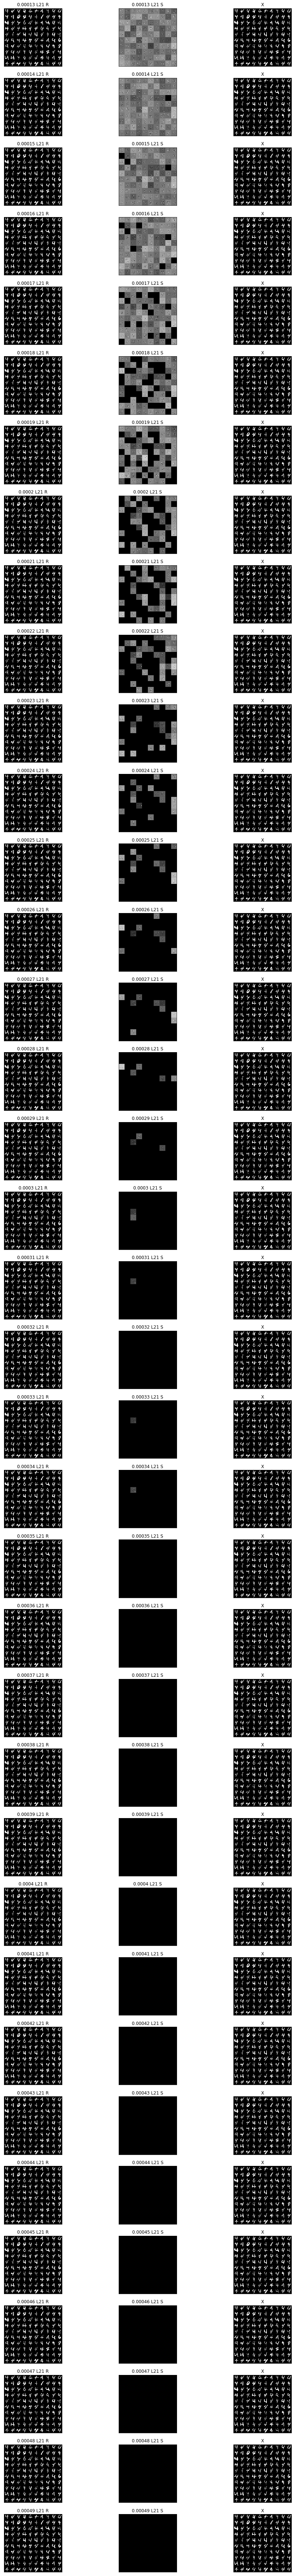

In [7]:
%matplotlib inline
ncol = 3
folder_cor = folder + "/" ##+corruption_level_folder[-2]
fig,ax = plt.subplots(nrows=len(lam_list),ncols=ncol)
X = im(folder_cor + "/" +r"X.png")
for index in range(len(lam_list)):
    l21R = im(folder_cor + "/" + "lam" +str(lam_list[index])+ "/" + r"l21R.png")
    l21S = im(folder_cor + "/" + "lam" +str(lam_list[index])+ "/" + r"l21S.png")
    
    ax[index][0].imshow(l21R,cmap = "gray")
    ax[index][1].imshow(l21S,cmap = "gray")
    ax[index][2].imshow(X,cmap = "gray")
    
    ax[index][0].set_title(str(lam_list[index])+r" L21 R")
    ax[index][1].set_title(str(lam_list[index])+r" L21 S")
    ax[index][2].set_title("X")
    ax[index][0].get_xaxis().set_visible(False)
    ax[index][0].get_yaxis().set_visible(False)
    ax[index][1].get_xaxis().set_visible(False)
    ax[index][1].get_yaxis().set_visible(False)
    ax[index][2].get_xaxis().set_visible(False)
    ax[index][2].get_yaxis().set_visible(False)
    
fig.set_size_inches(16,(len(lam_list))*3.5)
#fig.savefig(r"C:\Users\zc\Desktop\Result\Comparing.png",bbox_inches='tight')
plt.show()

# Benchmark Methods

## Isolation Forest

In [9]:
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
x = np.load(r"./data/data.npk")
print x.shape
def binary_y(value):
    if value == 4:
        return 1
    else:
        return -1
bi_y = map(binary_y,y)

(5124, 784)


In [10]:
fractions = np.arange(0.01,0.4,0.01)
y_preds = []
precisions=[]
fraction_list=[]
recalls=[]
f1s = []
for fraction in fractions:
    #model = EllipticEnvelope(contamination = fraction)
    model = IsolationForest(n_estimators=1000,contamination=fraction,n_jobs=6)
    model.fit(x)
    y_pred = model.predict(x)
    y_preds.append(y_pred)
    
    p = precision(bi_y,y_pred,labels=[1,-1],pos_label=-1)
    r = recall(bi_y,y_pred,labels=[1,-1],pos_label=-1)
    f1 = f1_score(bi_y,y_pred,labels=[1,-1],pos_label=-1)
    print "fraction",fraction
    print "precision", p
    print "recall", r
    print "f1", f1
    print "------------"
    precisions.append(p)
    recalls.append(r)
    f1s.append(f1)

fraction 0.01
precision 0.692307692308
recall 0.135849056604
f1 0.227129337539
------------
fraction 0.02
precision 0.553398058252
recall 0.215094339623
f1 0.309782608696
------------
fraction 0.03
precision 0.448051948052
recall 0.260377358491
f1 0.329355608592
------------
fraction 0.04
precision 0.419512195122
recall 0.324528301887
f1 0.365957446809
------------
fraction 0.05
precision 0.373540856031
recall 0.362264150943
f1 0.367816091954
------------
fraction 0.06
precision 0.340909090909
recall 0.396226415094
f1 0.366492146597
------------
fraction 0.07
precision 0.314763231198
recall 0.42641509434
f1 0.362179487179
------------
fraction 0.08
precision 0.29512195122
recall 0.456603773585
f1 0.358518518519
------------
fraction 0.09
precision 0.279220779221
recall 0.48679245283
f1 0.354883081155
------------
fraction 0.1
precision 0.263157894737
recall 0.509433962264
f1 0.347043701799
------------
fraction 0.11
precision 0.255319148936
recall 0.543396226415
f1 0.347406513872
-----

Max F1-score 0.367816091954


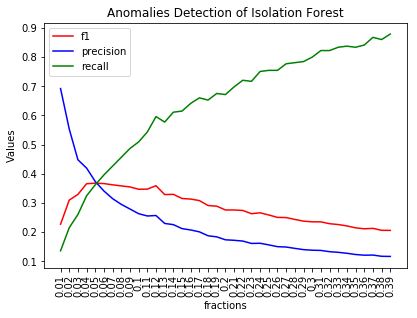

In [11]:
print "Max F1-score", np.max(f1s)
plt.close('all')
plt.figure(figsize=(6.5,4.5))
plt.xlabel("fractions")
plt.ylabel("Values")
plt.plot(range(len(fractions)),f1s,color='r',label="f1")
plt.plot(range(len(fractions)),precisions,color="b",label="precision")
plt.plot(range(len(fractions)),recalls,color="g",label="recall")
plt.legend(["f1","precision","recall"],loc='best')
plt.xticks(range(len(fractions)), fractions,rotation='vertical')
plt.title("Anomalies Detection of Isolation Forest")
plt.show()

## OneClass SVM

In [15]:
from sklearn.svm import OneClassSVM

In [16]:
fractions = np.arange(0.01,0.4,0.01)
y_preds = []
recalls=[]
f1s = []
precisions=[]
for fraction in fractions:
    model = OneClassSVM(nu=fraction)
    model.fit(x)
    y_pred = model.predict(x)
    y_preds.append(y_pred)
    p = precision(bi_y,y_pred,labels=[1,-1],pos_label=-1)
    r = recall(bi_y,y_pred,labels=[1,-1],pos_label=-1)
    f1 = f1_score(bi_y,y_pred,labels=[1,-1],pos_label=-1)
    print "fraction",fraction
    print "precision", p
    print "recall", r
    print "f1", f1
    print "------------"
    precisions.append(p)
    recalls.append(r)
    f1s.append(f1)

fraction 0.01
precision 0.5625
recall 0.101886792453
f1 0.172523961661
------------
fraction 0.02
precision 0.5
recall 0.192452830189
f1 0.277929155313
------------
fraction 0.03
precision 0.487012987013
recall 0.283018867925
f1 0.35799522673
------------
fraction 0.04
precision 0.456730769231
recall 0.358490566038
f1 0.401691331924
------------
fraction 0.05
precision 0.431906614786
recall 0.418867924528
f1 0.425287356322
------------
fraction 0.06
precision 0.419141914191
recall 0.479245283019
f1 0.447183098592
------------
fraction 0.07
precision 0.387640449438
recall 0.520754716981
f1 0.444444444444
------------
fraction 0.08
precision 0.371980676329
recall 0.581132075472
f1 0.453608247423
------------
fraction 0.09
precision 0.353448275862
recall 0.618867924528
f1 0.449931412894
------------
fraction 0.1
precision 0.330078125
recall 0.637735849057
f1 0.435006435006
------------
fraction 0.11
precision 0.3074204947
recall 0.656603773585
f1 0.418772563177
------------
fraction 0.12


Max F1-score 0.453608247423


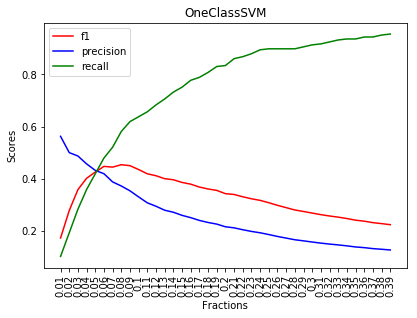

In [17]:
print "Max F1-score", np.max(f1s)
plt.figure(figsize=(6.5,4.5))
plt.xlabel("Fractions")
plt.ylabel("Scores")
plt.plot(range(len(fractions)),f1s,color='r',label="f1")
plt.plot(range(len(fractions)),precisions,color="b",label="precision")
plt.plot(range(len(fractions)),recalls,color="g",label="recall")
plt.legend(["f1","precision","recall"],loc='best')
plt.xticks(range(len(fractions)), fractions,rotation='vertical')
plt.title("OneClassSVM")
plt.show()